# Surface Hopping Examples
This notebook shows how to reproduce Tully's surface hopping tests for the simple avoided crossing model. The other two models can be 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qmp
%matplotlib notebook

plt.style.use('seaborn-ticks')

In [34]:
def plot_single(data, axes, label, name=''):
    
    x = data[:, 0]
    if 'dual' in name:
        x = np.log(x**2 / (2 * 2000))
        axes[2].set_xlabel('log(E (a.u.))')
    else:
        axes[2].set_xlabel('Momentum (a.u.)')
        
    axes[0].set_ylim(-0.17, 1.17)
    axes[1].set_ylabel('Probability')
    
    axes[0].plot(x, data[:, 2], label=label)
    axes[0].set_title('Transmission, n=1', y=0)
    
    axes[1].plot(x, data[:, 1], label=label)
    axes[1].set_title('Reflection, n=1', y=0)
    
    if 'extended' in name:
        axes[2].plot(x, data[:, 3], label=label)
        axes[2].set_title('Reflection, n=2', y=0)
    else:
        axes[2].plot(x, data[:, 4], label=label)
        axes[2].set_title('Transmission, n=2', y=0)
        
    axes[1].legend()

#### Initial parameters
For results comparable to Tully, change ntraj to 2000.

In [33]:
x = np.array([-5.])
dt = 2.
max_steps = 1e5
mass = np.array([2000])
initial_state = 0
integrator = qmp.integrator.HoppingIntegrator()

ntraj = 20
n_momenta = 16

# Simple Avoided Crossing
### Surface Hopping

In [23]:
potential = qmp.potential.tullymodels.TullySimpleAvoidedCrossing(cell=np.array([[-5, 5]]))

momenta = np.linspace(1, 32, n_momenta)
velocities = momenta / mass

results = np.zeros((len(momenta), 5))

for i, vel in enumerate(velocities):
    system = qmp.systems.Hopping(x, [vel], mass, initial_state, potential)
    surfhop = qmp.Model(potential=potential, mode='hop', system=system, integrator=integrator)
    surfhop.run(max_steps, dt=dt, ntraj=ntraj)
    dat = surfhop.data
    results[i, 0] = momenta[i]
    results[i, 1] = dat.reflect_lower
    results[i, 2] = dat.transmit_lower
    results[i, 3] = dat.reflect_upper
    results[i, 4] = dat.transmit_upper

Running 20 surface hopping trajectories for momentum = [1.]
20 successful trajectories completed.
Simulation complete.
Data contains the following entries:
name
mode
integrator
cell
reflect_lower
reflect_upper
transmit_lower
transmit_upper
Writing results to 'simulation.end'.
Running 20 surface hopping trajectories for momentum = [3.06666667]
20 successful trajectories completed.
Simulation complete.
Data contains the following entries:
name
mode
integrator
cell
reflect_lower
reflect_upper
transmit_lower
transmit_upper
Writing results to 'simulation.end'.
Running 20 surface hopping trajectories for momentum = [5.13333333]
20 successful trajectories completed.
Simulation complete.
Data contains the following entries:
name
mode
integrator
cell
reflect_lower
reflect_upper
transmit_lower
transmit_upper
Writing results to 'simulation.end'.
Running 20 surface hopping trajectories for momentum = [7.2]
20 successful trajectories completed.
Simulation complete.
Data contains the following entri

### Quantum

In [31]:
N = 512
dt = 15

integrator = qmp.integrator.SOFT_Propagator(dt)

momenta = np.linspace(1, 32, n_momenta)
quantum = np.zeros((len(momenta), 5))

for i, k in enumerate(momenta):
    sigma = 20 / k

    size = sigma * 4 + 10
    cell = np.array([[-size, size]])
    pot = qmp.potential.tullymodels.TullySimpleAvoidedCrossing(cell)
    system = qmp.systems.Grid(mass, cell, N, states=2)
    
    x = system.mesh[0] + sigma * 1.5 + 5
    psi_0 = np.exp(1j * k * x) * np.exp(-(x/sigma)**2)
    psi_0 /= np.sqrt(np.conjugate(psi_0).dot(psi_0))
    system.set_initial_wvfn(psi_0)

    avoided = qmp.Model(
            system=system,
            potential=pot,
            integrator=integrator,
            mode='wave'
            )

    avoided.run(max_steps)

    dat = avoided.data
    quantum[i, 0] = k
    quantum[i, 1] = dat.outcome[0, 0]
    quantum[i, 2] = dat.outcome[0, 1]
    quantum[i, 3] = dat.outcome[1, 0]
    quantum[i, 4] = dat.outcome[1, 1]

Integrating...
INTEGRATED

Success, all is well.
Simulation complete.
Data contains the following entries:
name
mode
integrator
cell
psi_t
N
rho_t
outcome
E_t
V
Writing results to 'simulation.end'.
Integrating...
INTEGRATED

Success, all is well.
Simulation complete.
Data contains the following entries:
name
mode
integrator
cell
psi_t
N
rho_t
outcome
E_t
V
Writing results to 'simulation.end'.
Integrating...
INTEGRATED

Success, all is well.
Simulation complete.
Data contains the following entries:
name
mode
integrator
cell
psi_t
N
rho_t
outcome
E_t
V
Writing results to 'simulation.end'.
Integrating...
INTEGRATED

Success, all is well.
Simulation complete.
Data contains the following entries:
name
mode
integrator
cell
psi_t
N
rho_t
outcome
E_t
V
Writing results to 'simulation.end'.
Integrating...
INTEGRATED

Success, all is well.
Simulation complete.
Data contains the following entries:
name
mode
integrator
cell
psi_t
N
rho_t
outcome
E_t
V
Writing results to 'simulation.end'.
Integratin

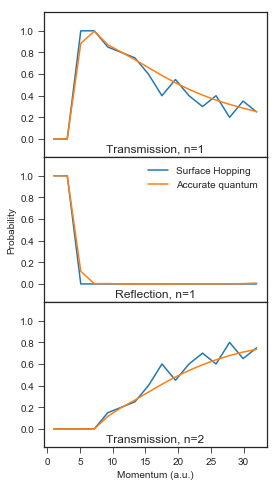

In [35]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(4, 8))
plt.subplots_adjust(hspace=0)

plot_single(results, axes, 'Surface Hopping')
plot_single(quantum, axes, 'Accurate quantum')